In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
dataset = pd.read_csv(r'C:\Users\Kartik12\Drill\ML\forestdata\Dataset1.txt')
dataset.to_csv(r'C:\Users\Kartik12\Drill\ML\forestdata\dataset.csv')

This dataset contains electronics, garments, office supplies and cosmetics that were purchased from a store over a week.
First we convert the text file to a csv type.

In [3]:
dataset.head()

,books camera laptop headphones table
0,cellphone monitor mouse TV keyboard
1,clothes shoes cosmetics headphones TV
2,cellphone TV books chair
3,shoes camera clothes cosmetics
4,cellphone books


## Preprocessing

Now we split the items individually and remove any null values.

In [4]:
dataset.columns = ['items']

In [5]:
dataset

,items
0,cellphone monitor mouse TV keyboard
1,clothes shoes cosmetics headphones TV
2,cellphone TV books chair
3,shoes camera clothes cosmetics
4,cellphone books
...,...
75,clothes cosmetics TV books
76,table chair shoes laptop
77,camera cosmetics cellphone
78,books clothes cellphone TV


In [6]:
df = (dataset['items'].str.split(" ", expand=True))

In [7]:
df

,0,1,2,3,4
0,cellphone,monitor,mouse,TV,keyboard
1,clothes,shoes,cosmetics,headphones,TV
2,cellphone,TV,books,chair,None
3,shoes,camera,clothes,cosmetics,None
4,cellphone,books,None,None,None
...,...,...,...,...,...
75,clothes,cosmetics,TV,books,None
76,table,chair,shoes,laptop,None
77,camera,cosmetics,cellphone,None,None
78,books,clothes,cellphone,TV,None


In [8]:
df.to_csv(r'C:\Users\Kartik12\Drill\ML\forestdata\Dataset.csv')

In [9]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       80 non-null     object
 1   1       80 non-null     object
 2   2       78 non-null     object
 3   3       51 non-null     object
 4   4       11 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


##### Next, we covert the dataframe into a list of transactions.

In [14]:
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, 5)])

In [15]:
transactions

[['cellphone', 'monitor', 'mouse', 'TV', 'keyboard'],
 ['clothes', 'shoes', 'cosmetics', 'headphones', 'TV'],
 ['cellphone', 'TV', 'books', 'chair', 'None'],
 ['shoes', 'camera', 'clothes', 'cosmetics', 'None'],
 ['cellphone', 'books', 'None', 'None', 'None'],
 ['cosmetics', 'shoes', 'books', 'None', 'None'],
 ['mouse', 'keyboard', 'headphones', 'cosmetics', 'None'],
 ['chair', 'table', 'books', 'None', 'None'],
 ['cellphone', 'laptop', 'TV', 'None', 'None'],
 ['camera', 'laptop', 'clothes', 'chair', 'None'],
 ['table', 'mouse', 'books', 'shoes', 'None'],
 ['cosmetics', 'clothes', 'shoes', 'laptop', 'None'],
 ['chair', 'mouse', 'TV', 'camera', 'None'],
 ['headphones', 'monitor', 'laptop', 'camera', 'None'],
 ['books', 'mouse', 'laptop', 'cosmetics', 'None'],
 ['clothes', 'cosmetics', 'cellphone', 'TV', 'None'],
 ['table', 'chair', 'headphones', 'shoes', 'None'],
 ['camera', 'cosmetics', 'laptop', 'cellphone', 'None'],
 ['books', 'camera', 'clothes', 'cellphone', 'TV'],
 ['books', 'came

#### We would have to encode the list as a boolean dataframe and remove the 'None' column to perform apriori accurately.

In [71]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
tr = pd.DataFrame(te_ary, columns=te.columns_)
tr = tr.drop(columns = ['None'])
tr

,TV,books,camera,cellphone,chair,clothes,cosmetics,headphones,keyboard,laptop,monitor,mouse,shoes,table
0,True,False,False,True,False,False,False,False,True,False,True,True,False,False
1,True,False,False,False,False,True,True,True,False,False,False,False,True,False
2,True,True,False,True,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,True,False,False,False,False,False,True,False
4,False,True,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,True,True,False,False,False,True,True,False,False,False,False,False,False,False
76,False,False,False,False,True,False,False,False,False,True,False,False,True,True
77,False,False,True,True,False,False,True,False,False,False,False,False,False,False
78,True,True,False,True,False,True,False,False,False,False,False,False,False,False


In [72]:
def encode_unit(x):
    if x == False:
        return 0
    if x == True:
        return 1

In [73]:
tr = tr.applymap(encode_unit)
tr

,TV,books,camera,cellphone,chair,clothes,cosmetics,headphones,keyboard,laptop,monitor,mouse,shoes,table
0,1,0,0,1,0,0,0,0,1,0,1,1,0,0
1,1,0,0,0,0,1,1,1,0,0,0,0,1,0
2,1,1,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,0,0,0,1,1,0,0,0,0,0,0,0
76,0,0,0,0,1,0,0,0,0,1,0,0,1,1
77,0,0,1,1,0,0,1,0,0,0,0,0,0,0
78,1,1,0,1,0,1,0,0,0,0,0,0,0,0


#### Now we apply the apriori algorithm and obtain frequent item sets.

In [74]:
frequent_itemsets = apriori(tr, min_support=0.01, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [75]:
frequent_itemsets[(frequent_itemsets['length']>=2)]

,support,itemsets,length
14,0.1375,"(books, TV)",2
15,0.0875,"(camera, TV)",2
16,0.2125,"(cellphone, TV)",2
17,0.0750,"(chair, TV)",2
18,0.1500,"(clothes, TV)",2
...,...,...,...
229,0.0250,"(cellphone, books, TV, clothes, camera)",5
230,0.0125,"(headphones, shoes, books, TV, clothes)",5
231,0.0375,"(keyboard, cellphone, monitor, TV, mouse)",5
232,0.0375,"(cosmetics, headphones, shoes, TV, clothes)",5


In [76]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=2).sort_values(by = ['lift'], ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
751,"(headphones, laptop, books)","(camera, table)",0.0250,0.0375,0.0250,1.000000,26.666667,0.024063,inf
764,"(camera, table)","(headphones, laptop, books)",0.0375,0.0250,0.0250,0.666667,26.666667,0.024063,2.925000
394,"(monitor, mouse)","(keyboard, TV)",0.0500,0.0500,0.0500,1.000000,20.000000,0.047500,inf
615,"(clothes, table)","(mouse, shoes)",0.0125,0.0500,0.0125,1.000000,20.000000,0.011875,inf
698,"(cellphone, monitor, mouse)","(keyboard, TV)",0.0375,0.0500,0.0375,1.000000,20.000000,0.035625,inf
...,...,...,...,...,...,...,...,...,...
136,"(clothes, laptop)",(chair),0.0875,0.2125,0.0375,0.428571,2.016807,0.018906,1.378125
19,(chair),"(camera, TV)",0.2125,0.0875,0.0375,0.176471,2.016807,0.018906,1.108036
356,(headphones),"(clothes, cosmetics, TV)",0.2125,0.0875,0.0375,0.176471,2.016807,0.018906,1.108036
347,"(clothes, cosmetics, TV)",(headphones),0.0875,0.2125,0.0375,0.428571,2.016807,0.018906,1.378125


#### We can infer from the top rules that table & camera and books, headphones & laptop are purchsed in a manner that is higher than the ovrall probablity would suggest.

Text(0.5, 1.0, 'Confidence')

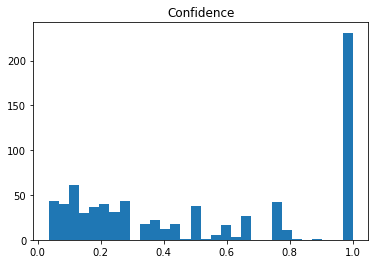

In [78]:
rules.hist('confidence', grid = False, bins = 30)
plt.title('Confidence')

Text(0.5, 1.0, 'Lift')

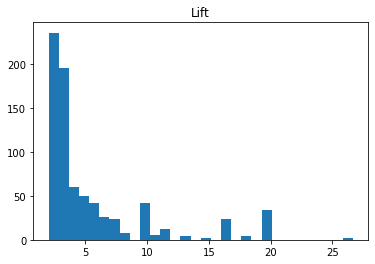

In [79]:
rules.hist('lift', grid = False, bins = 30)
plt.title('Lift')

#### Here is a scatter plot of confidence against support

In [80]:
support = rules['support'].to_numpy()
confidence = rules['confidence'].to_numpy()

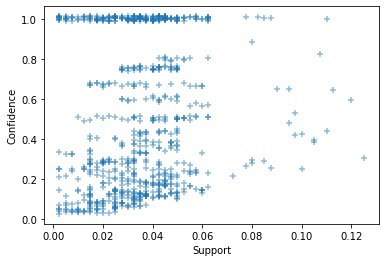

In [81]:
import random
for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) -5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) -5)
plt.scatter(support, confidence, alpha = 0.5, marker = '+')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

We can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations. We can also see several where the confidence is high as well.

In [82]:
rules[(rules['lift'] >= 6) & (rules['confidence']>= 0.8)].sort_values(by = ['lift'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
751,"(headphones, laptop, books)","(camera, table)",0.0250,0.0375,0.0325,1.0000,26.666667,0.024063,inf
693,"(cellphone, keyboard, mouse)","(monitor, TV)",0.0375,0.0500,0.0400,0.9975,20.000000,0.035625,inf
394,"(monitor, mouse)","(keyboard, TV)",0.0500,0.0500,0.0500,1.0050,20.000000,0.047500,inf
311,"(monitor, cellphone)","(keyboard, TV)",0.0375,0.0500,0.0400,1.0075,20.000000,0.035625,inf
564,"(mouse, cellphone)","(monitor, keyboard)",0.0375,0.0500,0.0325,0.9900,20.000000,0.035625,inf
...,...,...,...,...,...,...,...,...,...
720,"(headphones, cosmetics, shoes)","(clothes, TV)",0.0375,0.1500,0.0450,1.0125,6.666667,0.031875,inf
666,"(headphones, shoes, books)","(clothes, TV)",0.0125,0.1500,0.0075,1.0050,6.666667,0.010625,inf
754,"(headphones, books, table)","(laptop, camera)",0.0250,0.1625,0.0250,1.0025,6.153846,0.020938,inf
509,"(clothes, chair)","(laptop, camera)",0.0375,0.1625,0.0325,1.0000,6.153846,0.031406,inf


In these results, we have filtered out the item sets with high confidence and higher lift. These reults are useful for someone with good domain expertise as they can try and place these item sets closer to each other or some other techniques can be applied for better business.